In [1]:
import requests
import json
import pandas as pd
import keys

In [2]:
import requests

url = 'https://api.github.com/graphql'
json = { 'query' : '{viewer { login contributionsCollection {contributionCalendar {weeks { contributionDays {date weekday contributionCount contributionLevel color}}}}}}' }
api_token = keys.github_token
headers = {'Authorization': 'token %s' % api_token}

r = requests.post(url=url, json=json, headers=headers)
print (r.text)

{"data":{"viewer":{"login":"fniclause","contributionsCollection":{"contributionCalendar":{"weeks":[{"contributionDays":[{"date":"2021-06-27","weekday":0,"contributionCount":0,"contributionLevel":"NONE","color":"#ebedf0"},{"date":"2021-06-28","weekday":1,"contributionCount":1,"contributionLevel":"FIRST_QUARTILE","color":"#9be9a8"},{"date":"2021-06-29","weekday":2,"contributionCount":1,"contributionLevel":"FIRST_QUARTILE","color":"#9be9a8"},{"date":"2021-06-30","weekday":3,"contributionCount":0,"contributionLevel":"NONE","color":"#ebedf0"},{"date":"2021-07-01","weekday":4,"contributionCount":0,"contributionLevel":"NONE","color":"#ebedf0"},{"date":"2021-07-02","weekday":5,"contributionCount":6,"contributionLevel":"THIRD_QUARTILE","color":"#30a14e"},{"date":"2021-07-03","weekday":6,"contributionCount":0,"contributionLevel":"NONE","color":"#ebedf0"}]},{"contributionDays":[{"date":"2021-07-04","weekday":0,"contributionCount":0,"contributionLevel":"NONE","color":"#ebedf0"},{"date":"2021-07-05

In [3]:
r.json()['data']['viewer']['contributionsCollection']['contributionCalendar']['weeks'][0]['contributionDays']

[{'date': '2021-06-27',
  'weekday': 0,
  'contributionCount': 0,
  'contributionLevel': 'NONE',
  'color': '#ebedf0'},
 {'date': '2021-06-28',
  'weekday': 1,
  'contributionCount': 1,
  'contributionLevel': 'FIRST_QUARTILE',
  'color': '#9be9a8'},
 {'date': '2021-06-29',
  'weekday': 2,
  'contributionCount': 1,
  'contributionLevel': 'FIRST_QUARTILE',
  'color': '#9be9a8'},
 {'date': '2021-06-30',
  'weekday': 3,
  'contributionCount': 0,
  'contributionLevel': 'NONE',
  'color': '#ebedf0'},
 {'date': '2021-07-01',
  'weekday': 4,
  'contributionCount': 0,
  'contributionLevel': 'NONE',
  'color': '#ebedf0'},
 {'date': '2021-07-02',
  'weekday': 5,
  'contributionCount': 6,
  'contributionLevel': 'THIRD_QUARTILE',
  'color': '#30a14e'},
 {'date': '2021-07-03',
  'weekday': 6,
  'contributionCount': 0,
  'contributionLevel': 'NONE',
  'color': '#ebedf0'}]

In [4]:
data=r.json()['data']['viewer']['contributionsCollection']['contributionCalendar']

In [5]:
data

{'weeks': [{'contributionDays': [{'date': '2021-06-27',
     'weekday': 0,
     'contributionCount': 0,
     'contributionLevel': 'NONE',
     'color': '#ebedf0'},
    {'date': '2021-06-28',
     'weekday': 1,
     'contributionCount': 1,
     'contributionLevel': 'FIRST_QUARTILE',
     'color': '#9be9a8'},
    {'date': '2021-06-29',
     'weekday': 2,
     'contributionCount': 1,
     'contributionLevel': 'FIRST_QUARTILE',
     'color': '#9be9a8'},
    {'date': '2021-06-30',
     'weekday': 3,
     'contributionCount': 0,
     'contributionLevel': 'NONE',
     'color': '#ebedf0'},
    {'date': '2021-07-01',
     'weekday': 4,
     'contributionCount': 0,
     'contributionLevel': 'NONE',
     'color': '#ebedf0'},
    {'date': '2021-07-02',
     'weekday': 5,
     'contributionCount': 6,
     'contributionLevel': 'THIRD_QUARTILE',
     'color': '#30a14e'},
    {'date': '2021-07-03',
     'weekday': 6,
     'contributionCount': 0,
     'contributionLevel': 'NONE',
     'color': '#ebedf0

In [6]:
df = pd.json_normalize(data, record_path=['weeks','contributionDays'])

In [7]:
df

,date,weekday,contributionCount,contributionLevel,color
0,2021-06-27,0,0,NONE,#ebedf0
1,2021-06-28,1,1,FIRST_QUARTILE,#9be9a8
2,2021-06-29,2,1,FIRST_QUARTILE,#9be9a8
3,2021-06-30,3,0,NONE,#ebedf0
4,2021-07-01,4,0,NONE,#ebedf0
...,...,...,...,...,...
362,2022-06-24,5,0,NONE,#ebedf0
363,2022-06-25,6,0,NONE,#ebedf0
364,2022-06-26,0,3,SECOND_QUARTILE,#40c463
365,2022-06-27,1,1,FIRST_QUARTILE,#9be9a8


In [8]:
#Importing the seaborn library along with other dependencies
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime

In [9]:
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d')

In [10]:
df

,date,weekday,contributionCount,contributionLevel,color
0,2021-06-27,0,0,NONE,#ebedf0
1,2021-06-28,1,1,FIRST_QUARTILE,#9be9a8
2,2021-06-29,2,1,FIRST_QUARTILE,#9be9a8
3,2021-06-30,3,0,NONE,#ebedf0
4,2021-07-01,4,0,NONE,#ebedf0
...,...,...,...,...,...
362,2022-06-24,5,0,NONE,#ebedf0
363,2022-06-25,6,0,NONE,#ebedf0
364,2022-06-26,0,3,SECOND_QUARTILE,#40c463
365,2022-06-27,1,1,FIRST_QUARTILE,#9be9a8


In [11]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['week'] = df.date.dt.isocalendar().week

df['Weekday_name'] = df.date.dt.day_name()

In [12]:
df

,date,weekday,contributionCount,contributionLevel,color,year,month,week,Weekday_name
0,2021-06-27,0,0,NONE,#ebedf0,2021,6,25,Sunday
1,2021-06-28,1,1,FIRST_QUARTILE,#9be9a8,2021,6,26,Monday
2,2021-06-29,2,1,FIRST_QUARTILE,#9be9a8,2021,6,26,Tuesday
3,2021-06-30,3,0,NONE,#ebedf0,2021,6,26,Wednesday
4,2021-07-01,4,0,NONE,#ebedf0,2021,7,26,Thursday
...,...,...,...,...,...,...,...,...,...
362,2022-06-24,5,0,NONE,#ebedf0,2022,6,25,Friday
363,2022-06-25,6,0,NONE,#ebedf0,2022,6,25,Saturday
364,2022-06-26,0,3,SECOND_QUARTILE,#40c463,2022,6,25,Sunday
365,2022-06-27,1,1,FIRST_QUARTILE,#9be9a8,2022,6,26,Monday


In [13]:
df[['week','Weekday_name','contributionCount']]

,week,Weekday_name,contributionCount
0,25,Sunday,0
1,26,Monday,1
2,26,Tuesday,1
3,26,Wednesday,0
4,26,Thursday,0
...,...,...,...
362,25,Friday,0
363,25,Saturday,0
364,25,Sunday,3
365,26,Monday,1


In [14]:
pivoted_data = pd.pivot_table(df[['week','Weekday_name','contributionCount']],
                              values='contributionCount',index=['Weekday_name'] , columns=['week'])

In [15]:
pivoted_data

week,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
Weekday_name,,,,,,,,,,,,,,,,,,,,,
Friday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Monday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Saturday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sunday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Thursday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tuesday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wednesday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='week', ylabel='Weekday_name'>

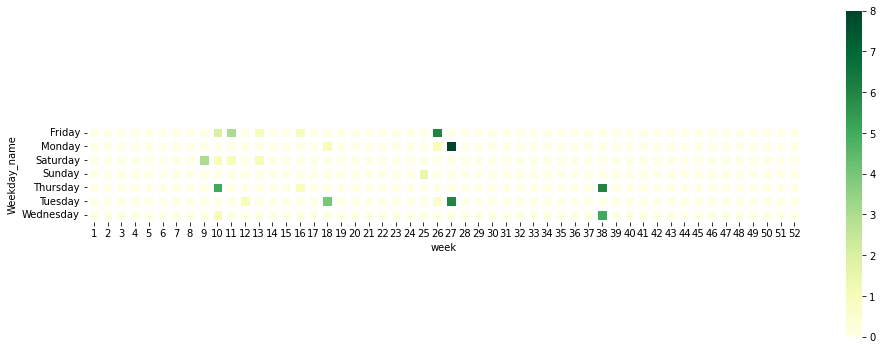

In [16]:
plt.figure(figsize = (16,6))
sns.heatmap(pivoted_data, linewidths=5, cmap='YlGn',linecolor='white', square=True)

In [17]:
df.set_index('date', inplace = True)

In [ ]:
df

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


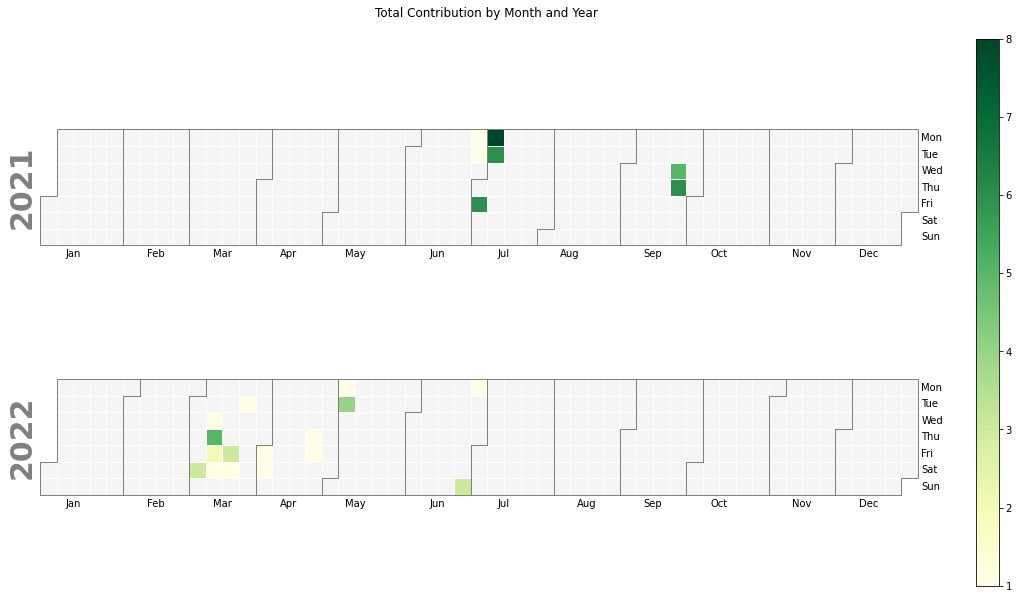

In [18]:
import calplot
pl1 = calplot.calplot(data = df['contributionCount'],how = 'sum', cmap = 'YlGn', figsize = (16, 8), suptitle = "Total Contribution by Month and Year")

In [ ]:
import streamlit as st

In [ ]:
st.write("My First Streamlit Web App")

df = pd.DataFrame({"one": [1, 2, 3], "two": [4, 5, 6], "three": [7, 8, 9]})
st.write(df)

In [ ]:
import streamlit as st

st.markdown("# Alan Jones")
st.markdown("## Writer and Developer")
st.markdown("""
    I write articles about Data Science, Python and related topics. 
    The articles are mostly written on the Medium platform.
    
    You can find my articles [here](https://alan-jones.medium.com)
    and if you would like to know when I publish new ones, you can 
    sign up for an email alert on my Medium 
    [page](https://alan-jones.medium.com/subscribe).
    Below are a few articles you might find interesting...
""")

with st.container():
    image_col, text_col = st.columns((1,2))
    with image_col:
        st.image("https://cdn-images-1.medium.com/max/906/1*dVSDol9pouoO9IX_E_-35Q.png")

    with text_col:
        st.subheader("A Multi-page Interactive Dashboard with Streamlit and Plotly")
        st.write("""Beautiful interactive multipage dashboards are made easy with Streamlit
            """)
        st.markdown("[Read more...](https://towardsdatascience.com/a-multi-page-interactive-dashboard-with-streamlit-and-plotly-c3182443871a)")
